In [37]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# To play the audio files
import IPython.display as ipd
from IPython.display import Audio

# Keras and TensorFlow imports (updated)
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, BatchNormalization, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

# Suppress warnings
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# Import TensorFlow
import tensorflow as tf 

print("Done")


Done


# Importing Data 

In [31]:
ravdess = "data/input/voice/"
ravdess_directory_list = os.listdir(ravdess)
ravdess_directory_list.sort()

print(ravdess_directory_list)
print('Isi Folder =',len(ravdess_directory_list))


['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']
Isi Folder = 24


# preprocessing

In [32]:
file_emotion = []
file_path = []

for i in ravdess_directory_list:
    actor_directory = os.path.join(ravdess, i)
    
    actor_files = os.listdir(actor_directory)
    
    for f in actor_files:
        part = f.split('.')[0].split('-')  # Memisahkan nama file
        
        # Mengambil emosi dari bagian ketiga nama file
        file_emotion.append(int(part[2]))  
        
        # Membangun path file lengkap dan menyimpannya
        file_path.append(os.path.join(actor_directory, f))


In [33]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-01-01-01-01-24.wav
03
data/input/voice/Actor_01\03-01-01-01-01-01-01.wav
8
03-01-08-02-02-02-24.wav


In [34]:
# Mengubah angka menjadi nama emosi yang sesuai
ravdess_df.Emotions.replace({1: 'neutral', 2: 'neutral', 3: 'happy', 4: 'sad', 
                             5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'},
                            inplace=True)

# Menampilkan hasil
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())


  Emotions                                    Path
0  neutral  data/Actor_01\03-01-01-01-01-01-01.wav
1  neutral  data/Actor_01\03-01-01-01-01-02-01.wav
2  neutral  data/Actor_01\03-01-01-01-02-01-01.wav
3  neutral  data/Actor_01\03-01-01-01-02-02-01.wav
4  neutral  data/Actor_01\03-01-02-01-01-01-01.wav
______________________________________________
      Emotions                                    Path
1435  surprise  data/Actor_24\03-01-08-01-02-02-24.wav
1436  surprise  data/Actor_24\03-01-08-02-01-01-24.wav
1437  surprise  data/Actor_24\03-01-08-02-01-02-24.wav
1438  surprise  data/Actor_24\03-01-08-02-02-01-24.wav
1439  surprise  data/Actor_24\03-01-08-02-02-02-24.wav
_______________________________________________
Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dtype: int64


In [35]:

data_path = ravdess_df
data_path.to_csv("data/output/data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,data/Actor_01\03-01-01-01-01-01-01.wav
1,neutral,data/Actor_01\03-01-01-01-01-02-01.wav
2,neutral,data/Actor_01\03-01-01-01-02-01-01.wav
3,neutral,data/Actor_01\03-01-01-01-02-02-01.wav
4,neutral,data/Actor_01\03-01-02-01-01-01-01.wav


In [36]:
print(data_path.Emotions.value_counts())


Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dtype: int64


>*                          Visualisasi dan Eksplorasi Data

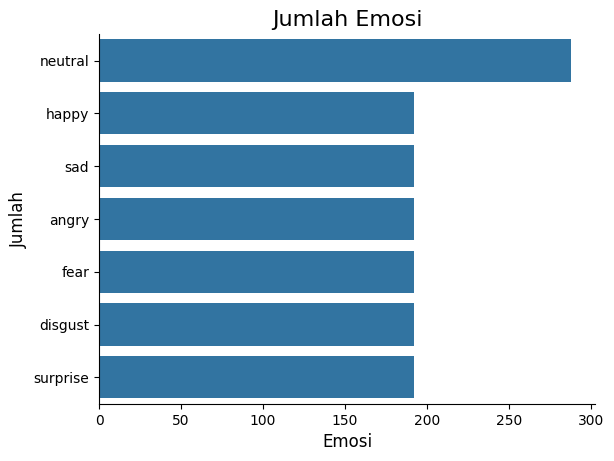

In [43]:
plt.title('Jumlah Emosi', size=16)  # Judul grafik
sns.countplot(data_path.Emotions)  # Membuat grafik jumlah emosi
plt.ylabel('Jumlah', size=12)  # Label sumbu y
plt.xlabel('Emosi', size=12)  # Label sumbu x
sns.despine(top=True, right=True, left=False, bottom=False)  # Menghapus garis tepi atas dan kanan
plt.show()  # Menampilkan grafik


In [42]:
data,sr = librosa.load(file_path[0])
sr

22050

In [44]:
ipd.Audio(data,rate=sr)

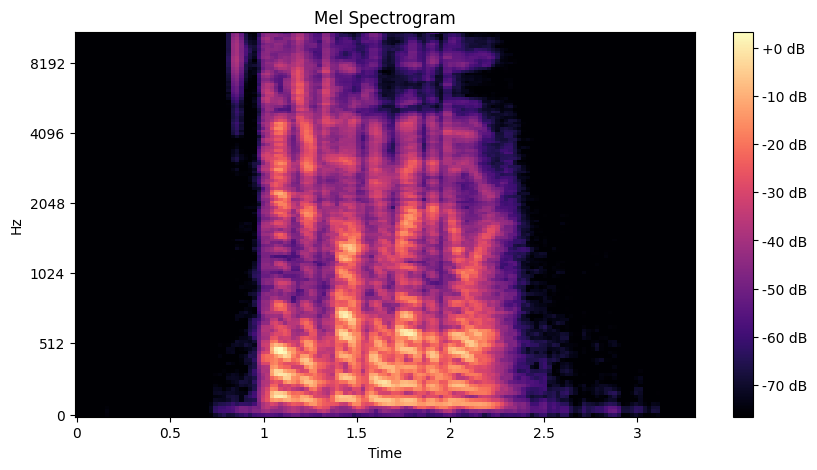

In [45]:
#Buat Mel spectrogram
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128, fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time')

plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()

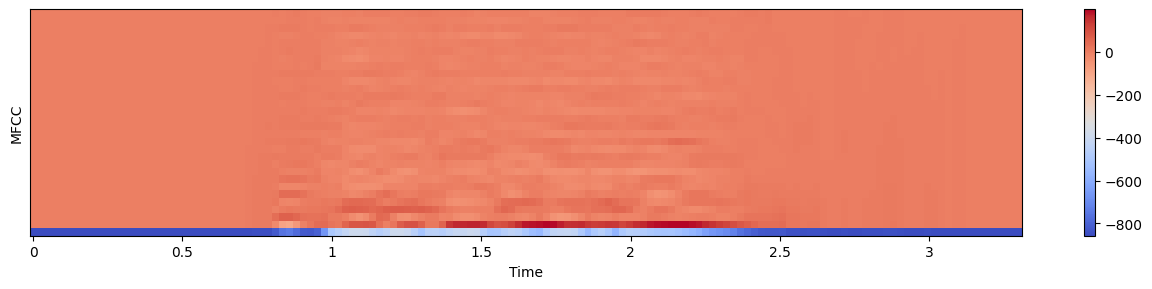

In [46]:
# Compute MFCC
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)

# Plot MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

# Play the audio
ipd.Audio(data, rate=sr)

# Data augmentation

In [65]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCHED AUDIO
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate) 
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor) 


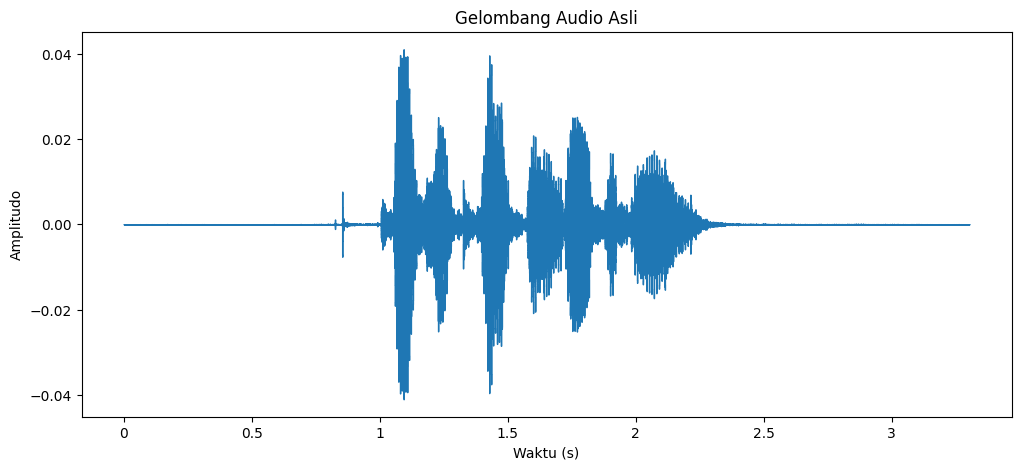

In [52]:
# NORMAL AUDIO
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
plt.title("Gelombang Audio Asli")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")

# Memutar audio
ipd.Audio(data, rate=sr)

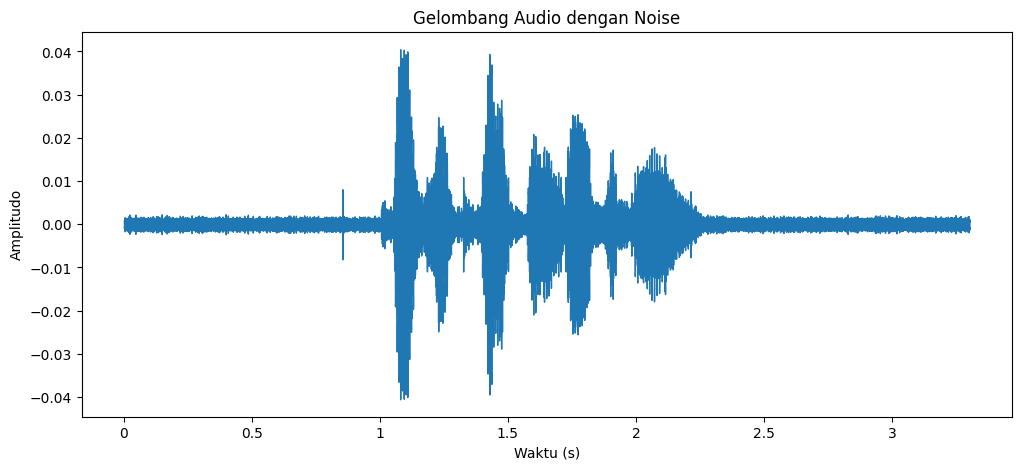

In [53]:
# Audio dengan Noise
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
plt.title("Gelombang Audio dengan Noise")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")

# Memutar audio
ipd.Audio(x, rate=sr)


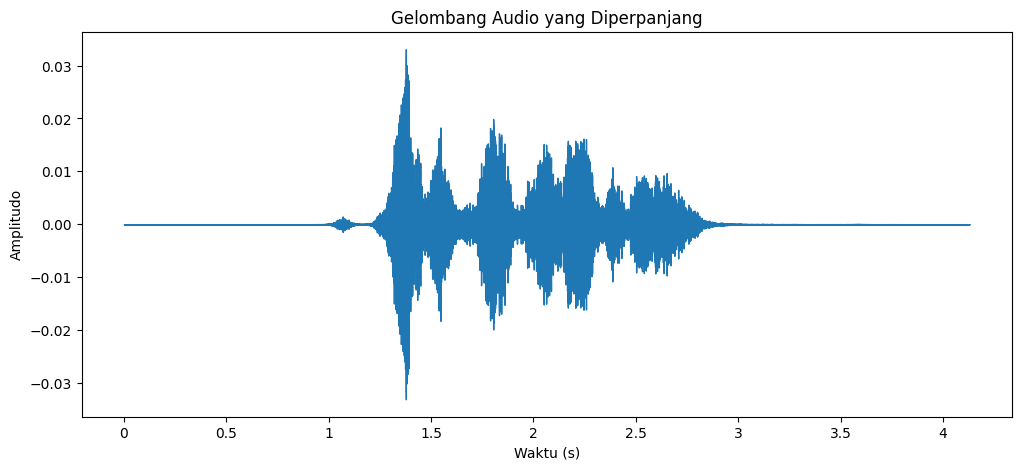

In [57]:
# Audio yang Diperpanjang (Stretched)
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
plt.title("Gelombang Audio yang Diperpanjang")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")

# Memutar audio
ipd.Audio(x, rate=sr)


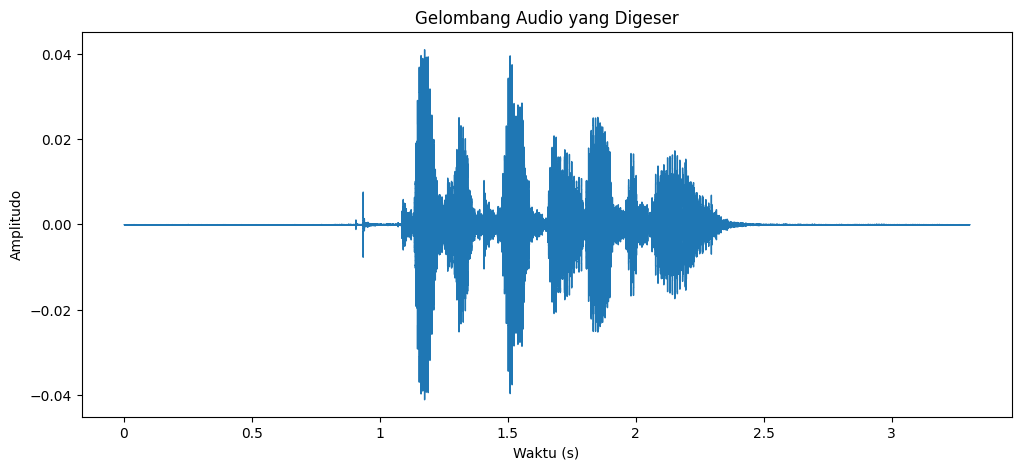

In [59]:
# Audio yang Digeser (Shifted)
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
plt.title("Gelombang Audio yang Digeser")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")

# Memutar audio
ipd.Audio(x, rate=sr)


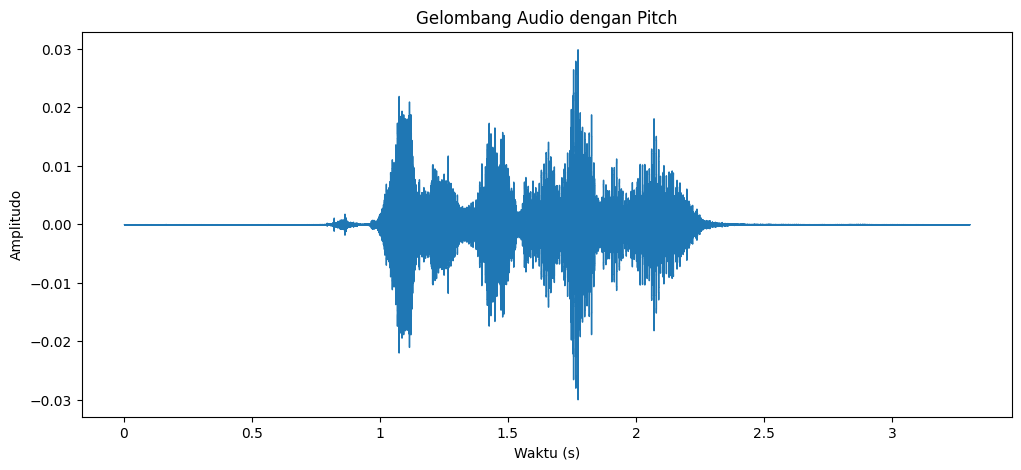

In [66]:
# Audio dengan Pitch 

x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
plt.title("Gelombang Audio dengan Pitch")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")

# Memutar audio
ipd.Audio(x, rate=sr)


# Feature extraction

In [67]:
# ZCR
def zcr(data, frame_length, hop_length):
    zcr = librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

# RMSE
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

# MFCC
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True, n_mfcc=13):
    mfcc = librosa.feature.mfcc(data, sr=sr, n_mfcc=n_mfcc)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

# Extracting features from audio data
def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((result,
                        zcr(data, frame_length, hop_length),
                        rmse(data, frame_length, hop_length),
                        mfcc(data, sr, frame_length, hop_length)
                       ))
    return result

# Feature extraction with augmentation
def get_features(path, duration=2.5, offset=0.6):
    data, sr = librosa.load(path, duration=duration, offset=offset)
    audio_features = extract_features(data, sr)

    # Apply noise augmentation
    noised_audio = noise(data)
    noised_features = extract_features(noised_audio, sr)
    audio_features = np.vstack((audio_features, noised_features))

    # Apply pitch shift
    pitched_audio = pitch(data, sr)
    pitched_features = extract_features(pitched_audio, sr)
    audio_features = np.vstack((audio_features, pitched_features))

    # Apply pitch + noise augmentation
    pitched_noised_audio = noise(pitched_audio)
    pitched_noised_features = extract_features(pitched_noised_audio, sr)
    audio_features = np.vstack((audio_features, pitched_noised_features))

    return audio_features

# Ensure noise and pitch functions are defined as before.
# Example of calling the function:
# features = get_features('path_to_audio_file')


In [68]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  8


# Normal way to get features


In [69]:
import timeit
from tqdm import tqdm

start = timeit.default_timer()
X, Y = [], []
for path, emotion, index in tqdm(zip(data_path.Path, data_path.Emotions, range(data_path.Path.shape[0]))):
    features = get_features(path)
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')

stop = timeit.default_timer()
print('Time: ', stop - start)


0it [00:00, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'data/Actor_01\\03-01-01-01-01-01-01.wav'